In [1]:
#prediction task is to determine whether or not target is high risk or low risk

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [2]:
train = pd.read_csv('Instructions/Resources/Generator/2019loans.csv')
test = pd.read_csv('Instructions/Resources/Generator/2020Q1loans.csv')

In [3]:
test_2020 = test.drop(columns=['target'])

In [4]:
train_2019 = train.drop(columns=['target'])

In [5]:
X = train_2019

In [46]:
X2 = test_2020 
X2_dummies = pd.get_dummies(X2)
X2_columns = X2_dummies.columns
print(X2_columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [47]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies
uncommon_cat = []
for cat in X_dummies: 
    if cat not in X2_dummies:
        uncommon_cat.append(cat)
print(uncommon_cat)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [48]:
#checking on the dropped column
X_dummies = X_dummies.drop(columns = 'debt_settlement_flag_Y')
dflag = X_dummies['debt_settlement_flag_N']
cflag = ''
for i in dflag: 
    if i == '0': 
        cflag.append(i)
print(f'cflag ={cflag}')

cflag =


In [49]:
y_train = train['target']
y_train

0         low_risk
1         low_risk
2         low_risk
3         low_risk
4         low_risk
           ...    
12175    high_risk
12176    high_risk
12177    high_risk
12178    high_risk
12179    high_risk
Name: target, Length: 12180, dtype: object

In [50]:
y_test = test['target']
y_test

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
          ...    
4697    high_risk
4698    high_risk
4699    high_risk
4700    high_risk
4701    high_risk
Name: target, Length: 4702, dtype: object

In [51]:
# X_train2019, X_test2019, y_train2019, y_test2019 = train_test_split(X_dummies, y_label, random_state=1)
# no split needed 

In [52]:
scaler = StandardScaler().fit(X_dummies)
X_train_2019scaled = scaler.transform(X_dummies)
X_test_2020scaled = scaler.transform(X2_dummies)
X_train_2019scaled

array([[-1.00869871,  0.91961977, -0.85042027, ...,  0.16843038,
        -0.16843038,  0.02026518],
       [ 2.22409871,  0.38717869,  1.60261212, ...,  0.16843038,
        -0.16843038,  0.02026518],
       [-0.61684447,  1.2257734 , -0.71936772, ...,  0.16843038,
        -0.16843038,  0.02026518],
       ...,
       [-1.3417748 ,  0.85876936, -1.27703164, ...,  0.16843038,
        -0.16843038,  0.02026518],
       [-0.22499024, -1.00667601, -0.10257157, ...,  0.16843038,
        -0.16843038,  0.02026518],
       [-0.22499024,  0.69143074,  0.11792955, ...,  0.16843038,
        -0.16843038,  0.02026518]])

In [53]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=1)
classifier

LogisticRegression(random_state=1)

In [54]:
classifier.fit(X_train_2019scaled, y_train)
classifier.score(X_train_2019scaled, y_train)

/Users/Vanga/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7108374384236453

PREDICTION: 

There are multiple categorical variables because of "get_dummies" so I think that will provide the Logistic Regression model with a lot of useful training data, which may help it perform better than the Random Forest Classifier. 

In [55]:
print(f"Training Data Score: {classifier.score(X_train_2019scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_2020scaled, y_test)}")

Training Data Score: 0.7108374384236453
Testing Data Score: 0.7596767333049766


In [56]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test_2020scaled)
confusion_matrix(y_true, y_pred)

array([[1762,  589],
       [ 541, 1810]])

In [57]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.7596767333049766


In [58]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_2019scaled, y_train)
print(f'Training Score: {clf.score(X_train_2019scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_2020scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6439812845597618


[1.61936400e-02 3.38204293e-02 3.06867974e-02 1.44132520e-02
 1.53403521e-02 2.97039970e-03 4.19684115e-03 8.52639566e-03
 1.34011600e-03 1.49794045e-02 1.14806151e-02 2.95126314e-02
 2.96423255e-02 4.53810478e-02 4.52153533e-02 5.32710182e-02
 4.75192818e-02 1.71819289e-02 0.00000000e+00 0.00000000e+00
 1.01845843e-01 6.62760338e-04 0.00000000e+00 0.00000000e+00
 4.22370045e-03 1.34809762e-02 4.53726683e-03 6.67364447e-03
 3.97499067e-03 6.12669840e-03 1.17797351e-02 1.33496386e-02
 1.40556883e-02 5.03286449e-03 7.88326739e-03 1.53783773e-02
 1.31396255e-02 1.54051334e-02 6.03171195e-03 6.77005919e-03
 7.80891532e-03 9.64914400e-03 1.40513366e-02 1.55344031e-02
 1.41277359e-02 2.83432087e-04 0.00000000e+00 1.54198240e-02
 1.65154545e-02 1.20253520e-02 9.95644904e-03 5.70186452e-03
 1.29315697e-02 1.20098895e-02 3.55781234e-03 7.10679177e-03
 7.86684410e-03 7.11918454e-03 8.76864617e-03 1.04145566e-02
 8.36143398e-03 1.00202334e-02 7.82922578e-03 8.58946961e-03
 0.00000000e+00 0.000000

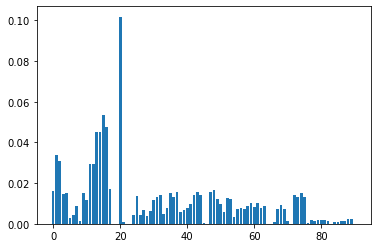

In [60]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()